<a href="https://colab.research.google.com/github/Kahkashan2708/Face-mask-detection/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Importing Face Mask Dataset

In [3]:
# API to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 78% 127M/163M [00:00<00:00, 1.32GB/s]
100% 163M/163M [00:00<00:00, 1.21GB/s]


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is Extracted")

The dataset is Extracted


In [5]:
!ls   # it lists all files and folders in the current directory.

data  face-mask-dataset.zip  kaggle.json  sample_data


## Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_3241.jpg', 'with_mask_344.jpg', 'with_mask_1061.jpg', 'with_mask_3686.jpg', 'with_mask_2402.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_2144.jpg', 'without_mask_3409.jpg', 'without_mask_1601.jpg', 'without_mask_560.jpg', 'without_mask_1460.jpg']


In [9]:
print("The Number of With Mask Images: ", len(with_mask_files))
print("The Number of Without Mask Images: ", len(without_mask_files))

The Number of With Mask Images:  3725
The Number of Without Mask Images:  3828


### Creating labels for the two class of Images

* with mask --> 0
* without mask --> 1

In [10]:
# Create the labels
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels=with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Displaying the images

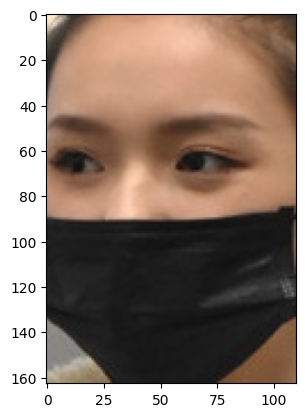

In [14]:
# displaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_527.jpg')
imgplot=plt.imshow(img)
plt.show()

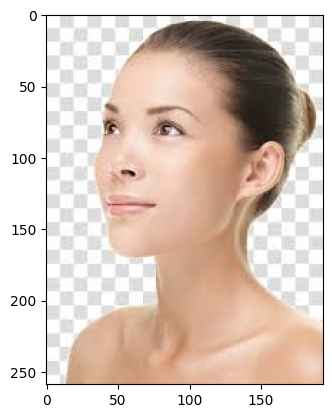

In [15]:
# displaying without mask image
img=mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show()

# ***Image Processing***

1. Resize the image
2. Convert the images into numpy array

In [16]:
# convert image to numpy array

with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file )
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'



for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file )
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 87,  96,  85],
        [ 95, 102,  90],
        [113, 118, 107],
        ...,
        [227, 220, 161],
        [234, 228, 166],
        [232, 227, 163]],

       [[134, 143, 132],
        [121, 128, 116],
        [114, 119, 108],
        ...,
        [230, 222, 162],
        [230, 223, 159],
        [229, 223, 158]],

       [[157, 165, 153],
        [163, 170, 158],
        [143, 148, 136],
        ...,
        [227, 216, 154],
        [220, 209, 144],
        [238, 228, 161]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
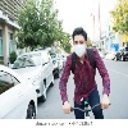

In [ ]:
data[0]

In [19]:
# coverting list data into numpy array

X=np.array(data)
Y=np.array(labels)

In [22]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


## Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
# Scaling the data

X_train_scaled= X_train/255
X_test_scaled= X_test/255

## Building a Convolutional Network (CNN)

In [27]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes=2


model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['acc'])

## Training the Neural Network

In [33]:
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - acc: 0.6899 - loss: 0.6699 - val_acc: 0.8694 - val_loss: 0.2853
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8785 - loss: 0.3130 - val_acc: 0.8926 - val_loss: 0.2304
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8932 - loss: 0.2649 - val_acc: 0.9124 - val_loss: 0.2206
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9254 - loss: 0.1740 - val_acc: 0.9025 - val_loss: 0.2397
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9377 - loss: 0.1699 - val_acc: 0.9107 - val_loss: 0.1953
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9395 - loss: 0.1597 - val_acc: 0.9223 - val_loss: 0.1996
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9506 - loss: 0.1240 - val_acc: 0.9157 - val_loss: 0.1906
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9571 - loss: 0.1072 - val_acc: 0.9140 - val_loss: 0.2410
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms